In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-av/train_v9rqX0R.csv


In [57]:
df = pd.read_csv('//kaggle/input/sales-av/train_v9rqX0R.csv')
data = pd.read_csv('//kaggle/input/sales-av/train_v9rqX0R.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  scaled_vis                 8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

### Data Cleaning

In [59]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [60]:
del df['scaled_vis']
df["Item_Fat_Content"].replace({"low fat": "Low Fat", "LF": "Low Fat", 'reg':'Regular'}, inplace=True)

In [61]:
#adding mean weight to NaN values 
#filling nan values in weight by mean

df.Item_Weight = df.groupby('Item_Type')['Item_Weight'].apply(lambda x: x.fillna(x.mean()))
df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [62]:
#faults in first iteration

df = df.drop(columns = ['Item_Identifier', 'Outlet_Identifier'])

### EDA

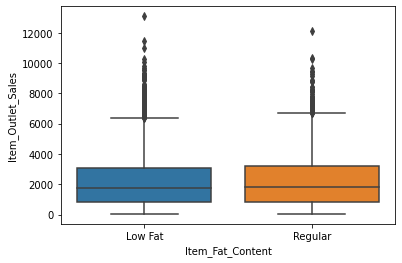

In [63]:
import seaborn as sns
ax = sns.boxplot(y=df['Item_Outlet_Sales'], x=df['Item_Fat_Content'], data=df, orient="v")

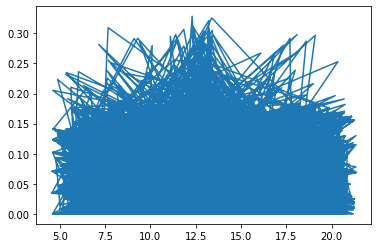

In [64]:
import matplotlib.pyplot as plt
plt.plot(df['Item_Weight'], df['Item_Visibility'])

In [65]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [66]:
see = df.groupby(['Item_Type']).count
see

<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fc9f3e34450>>

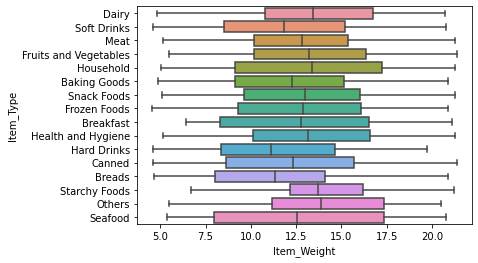

In [67]:
ax = sns.boxplot(y=df['Item_Type'], x=df['Item_Weight'], data=df, orient="h")

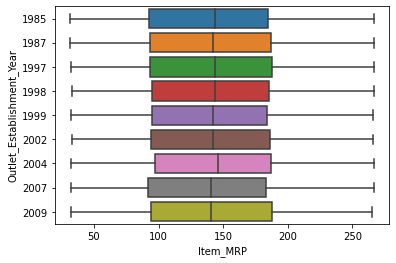

In [68]:
ax = sns.boxplot(y=df['Outlet_Establishment_Year'], x=df['Item_MRP'], data=df, orient="h")

In [69]:
a = df['Item_Fat_Content'].value_counts()
b = df['Item_Type'].value_counts()
c = df['Outlet_Size'].value_counts()
d = df['Outlet_Type'].value_counts()
e = df['Outlet_Location_Type'].value_counts()
f = df['Outlet_Establishment_Year'].value_counts()

In [70]:
a.index

Index(['Low Fat', 'Regular'], dtype='object')

Text(0.5, 1.0, 'Item fat content')

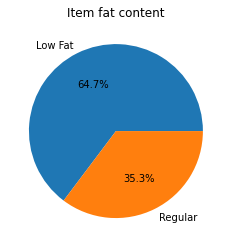

In [71]:
plt.pie(a, labels = a.index, autopct='%1.1f%%');
plt.title('Item fat content')

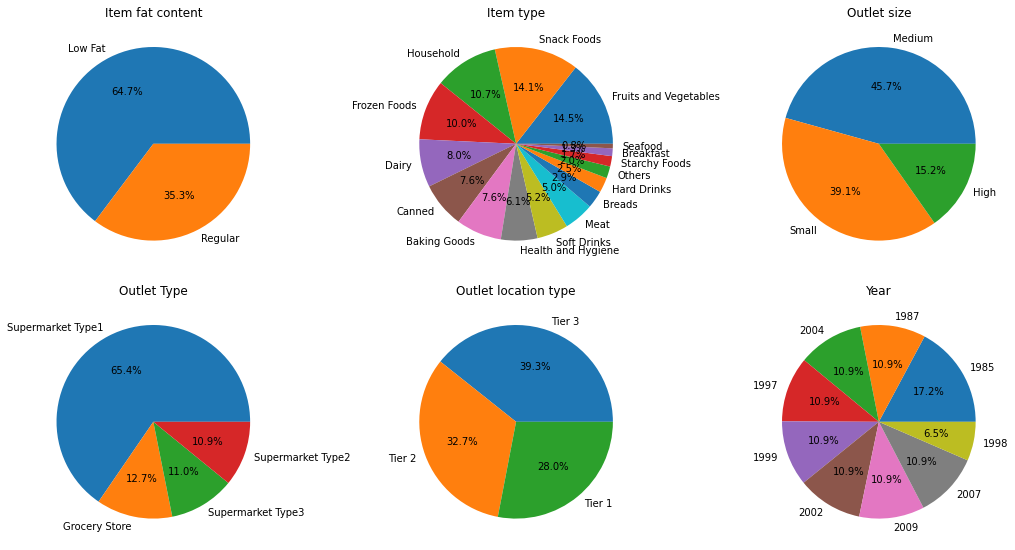

In [72]:
figure, axis = plt.subplots(2,3, figsize=(15,8))


axis[0,0].pie(a, labels = a.index, autopct='%1.1f%%');
axis[0,0].title.set_text('Item fat content')
axis[0,1].pie(b, labels = b.index,autopct='%1.1f%%');
axis[0,1].title.set_text('Item type')
axis[0,2].pie(c, labels = c.index, autopct='%1.1f%%');
axis[0,2].title.set_text('Outlet size')
axis[1,0].pie(d, labels = d.index, autopct='%1.1f%%');
axis[1,0].title.set_text('Outlet Type')
axis[1,1].pie(e, labels = e.index, autopct='%1.1f%%');
axis[1,1].title.set_text('Outlet location type')
axis[1,2].pie(f, labels = f.index, autopct='%1.1f%%');
axis[1,2].title.set_text('Year')


figure.tight_layout(pad=2.0)

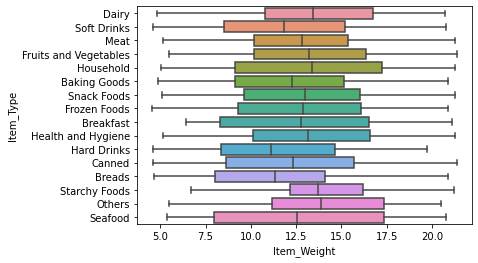

In [73]:
ax = sns.boxplot(y=df['Item_Type'], x=df['Item_Weight'], data=df, orient="h")

In [74]:
case  = df.groupby(['Item_Type']).agg({'Item_MRP': ['mean']})
case

,Item_MRP
,mean
Item_Type,
Baking Goods,126.380766
Breads,140.952669
Breakfast,141.788151
Canned,139.763832
Dairy,148.499208
Frozen Foods,138.503366
Fruits and Vegetables,144.581235
Hard Drinks,137.077928


In [75]:
case.info

<bound method DataFrame.info of                          Item_MRP
                             mean
Item_Type                        
Baking Goods           126.380766
Breads                 140.952669
Breakfast              141.788151
Canned                 139.763832
Dairy                  148.499208
Frozen Foods           138.503366
Fruits and Vegetables  144.581235
Hard Drinks            137.077928
Health and Hygiene     130.818921
Household              149.424753
Meat                   139.882032
Others                 132.851430
Seafood                141.841719
Snack Foods            146.194934
Soft Drinks            131.492506
Starchy Foods          147.838023>

In [96]:
corr = df.corr()
corr

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Outlet_Sales,1.000000,0.012088,-0.128625,0.567574,-0.049135
Item_Weight,0.012088,1.000000,-0.011620,0.025821,-0.008376
Item_Visibility,-0.128625,-0.011620,1.000000,-0.001315,-0.074834
Item_MRP,0.567574,0.025821,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,-0.049135,-0.008376,-0.074834,0.005020,1.000000


<AxesSubplot:>

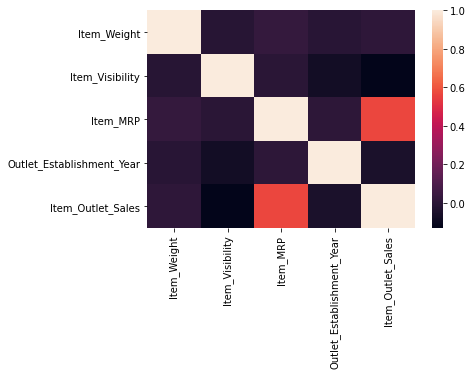

In [77]:
sns.heatmap(corr)

In [99]:
#kind of products from Grocery
only_grc = df.loc[df['Outlet_Type'] == 'Grocery Store']['Item_Type']
only_grc

3       Fruits and Vegetables
23               Baking Goods
28                      Dairy
29                     Canned
30                      Dairy
                ...          
8473              Hard Drinks
8480              Snack Foods
8486    Fruits and Vegetables
8490    Fruits and Vegetables
8509    Fruits and Vegetables
Name: Item_Type, Length: 1083, dtype: object

In [100]:
case2 = df.groupby(['Outlet_Type']).count()['Item_Outlet_Sales']
case3 = df.groupby(['Outlet_Type']).sum()['Item_Outlet_Sales']

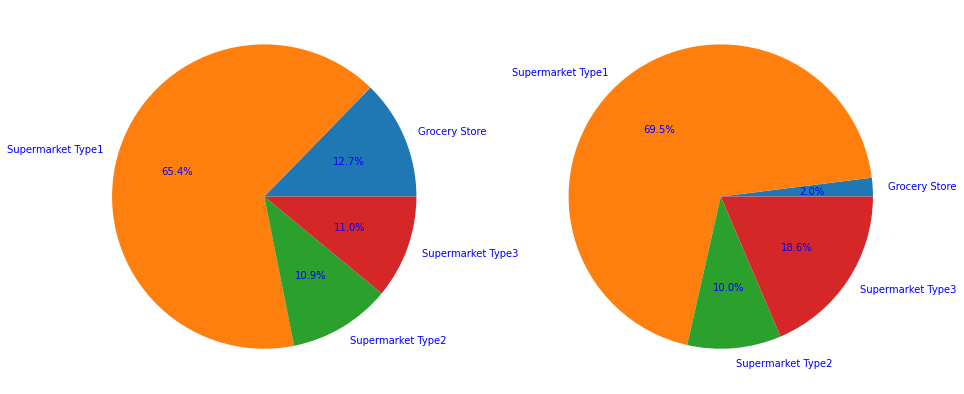

In [102]:
figure, axis = plt.subplots(1,2, figsize=(15,8))
axis[0].pie(case2, labels = case2.index, textprops={'color':"b"},autopct='%1.1f%%');
axis[1].pie(case3, labels = case3.index, textprops={'color':"b"},autopct='%1.1f%%');

<AxesSubplot:ylabel='Item_Outlet_Sales'>

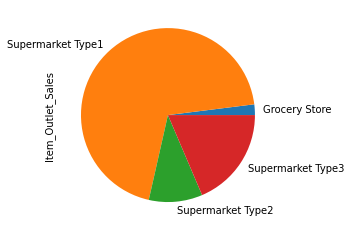

In [103]:
case3.plot.pie(labels = case3.index)

### Encoding and Test - train split

In [105]:
df.columns

Index(['Item_Outlet_Sales', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [106]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

### Data Preparation

In [107]:
#setting independent and dependent variable

cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

X = df.iloc[:,1:]
y = df.iloc[:,0]

X = X.drop(columns = {'Outlet_Size'})

In [108]:
#encoding and test train split
X  = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [85]:
#sttandard scaling the data

from sklearn import preprocessing
X_scaled = preprocessing.StandardScaler().fit_transform(X.astype(float))
y_scaled = preprocessing.StandardScaler().fit_transform(y.astype(float).values.reshape(-1,1))
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split( X_scaled, y_scaled, test_size=0.2, random_state=4)


### Modelling

In [86]:
#knn

from sklearn.neighbors import KNeighborsRegressor
reg_knn = KNeighborsRegressor(n_neighbors=6)
reg_knn.fit(X_train, y_train)

y_pred = reg_knn.predict(X_test)
y_true=  y_test

from sklearn.metrics import mean_squared_error
print("kNN RMS error(before scaling) =", mean_squared_error(y_true, y_pred))
from sklearn.metrics import r2_score
print("kNN r2 Score(before scaling) =", r2_score(y_true, y_pred))


kNN RMS error(before scaling) = 1599667.2632445022
kNN r2 Score(before scaling) = 0.453452654964286


In [87]:
reg_knn_s = KNeighborsRegressor(n_neighbors=6)
reg_knn_s.fit(X_train_s, y_train_s)

y_pred = reg_knn_s.predict(X_test_s)
y_true=  y_test_s

from sklearn.metrics import mean_squared_error
print("kNN RMS error(after scaling) =", mean_squared_error(y_true, y_pred))
from sklearn.metrics import r2_score
print("kNN r2 Score(after scaling) =", r2_score(y_true, y_pred))

kNN RMS error(after scaling) = 0.47177338561001475
kNN r2 Score(after scaling) = 0.4975609943147751


In [88]:
# linear reg

from sklearn import linear_model
reg_mlr = linear_model.LinearRegression()
reg_mlr.fit(X_train, y_train)

y_pred = reg_mlr.predict(X_test)
y_true=  y_test

from sklearn.metrics import mean_squared_error
print("Linear RMS error(before scaling) =", mean_squared_error(y_true, y_pred))
from sklearn.metrics import r2_score
print("Linear r2 Score(before scaling) =", r2_score(y_true, y_pred))

Linear RMS error(before scaling) = 1283941.0646505484
Linear r2 Score(before scaling) = 0.561324660327297


In [89]:
reg_mlr_s = linear_model.LinearRegression()
reg_mlr_s.fit(X_train_s, y_train_s)

y_pred = reg_mlr_s.predict(X_test_s)
y_true =  y_test_s

from sklearn.metrics import mean_squared_error
print("Linear RMS error(after scaling) =", mean_squared_error(y_true, y_pred))
from sklearn.metrics import r2_score
print("Linear r2 Score(after scaling) =", r2_score(y_true, y_pred))

Linear RMS error(after scaling) = 0.42369676626917147
Linear r2 Score(after scaling) = 0.5487626295810091


In [90]:
#lasso regression

from sklearn.linear_model import Lasso

reg_las = Lasso(alpha=0.01)
reg_las.fit(X_train, y_train)

y_pred = reg_las.predict(X_test)
y_true=  y_test

from sklearn.metrics import mean_squared_error
print("Lasso Regression RMS error(before scaling) =", mean_squared_error(y_true, y_pred))
from sklearn.metrics import r2_score
print("Regression r2 Score(before scaling) =", r2_score(y_true, y_pred))

Lasso Regression RMS error(before scaling) = 1283899.7513639326
Regression r2 Score(before scaling) = 0.5613387755546528


In [91]:
reg_las_s = Lasso(alpha=0.01)
reg_las.fit(X_train_s, y_train_s)

y_pred = reg_las.predict(X_test_s)
y_true=  y_test_s

from sklearn.metrics import mean_squared_error
print("Lasso Regression RMS error(After scaling) =", mean_squared_error(y_true, y_pred))
from sklearn.metrics import r2_score
print("Lasso Regression r2 Score(Before scaling) =", r2_score(y_true, y_pred))

Lasso Regression RMS error(After scaling) = 0.42090662025265135
Lasso Regression r2 Score(Before scaling) = 0.5517341371586235


In [92]:
#random forest

from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(max_depth=5, random_state=0)
reg_rf.fit(X_train, y_train)

y_pred = reg_rf.predict(X_test)
y_true=  y_test

from sklearn.metrics import mean_squared_error
print("Random forest RMS error(Before scaling) =", mean_squared_error(y_true, y_pred))
from sklearn.metrics import r2_score
print("Random forest r2 Score(Before scaling) =", r2_score(y_true, y_pred))

Random forest RMS error(Before scaling) = 1189078.159724651
Random forest r2 Score(Before scaling) = 0.5937358185855879


In [93]:
reg_rf_s = RandomForestRegressor(max_depth=5, random_state=0)
reg_rf_s.fit(X_train_s, y_train_s)

y_pred = reg_rf_s.predict(X_test_s)
y_true=  y_test_s

from sklearn.metrics import mean_squared_error
print("Random forest RMS error(After scaling) =", mean_squared_error(y_true, y_pred))
from sklearn.metrics import r2_score
print("Random forest r2 Score(After scaling) =", r2_score(y_true, y_pred));

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random forest RMS error(After scaling) = 0.3916482063735761
Random forest r2 Score(After scaling) = 0.5828943696467728
